#### Exam RNNs

A character-level RNN reads words as a series of characters - outputting a prediction and “hidden state” at each step, feeding its previous hidden state into each next step. We take the final prediction to be the output, i.e. which class the word belongs to.

In [66]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import unicodedata
import string

def findFiles(path):
    '''
    The glob module finds 
    all the pathnames matching 
    a specified pattern according 
    to the rules used by the Unix shell, 
    although results are returned 
    in arbitrary order.
    '''
    return glob.glob(path)

print(findFiles('data/names/*.txt'))

['data/names/Arabic.txt', 'data/names/Chinese.txt', 'data/names/Czech.txt', 'data/names/Dutch.txt', 'data/names/English.txt', 'data/names/French.txt', 'data/names/German.txt', 'data/names/Greek.txt', 'data/names/Irish.txt', 'data/names/Italian.txt', 'data/names/Japanese.txt', 'data/names/Korean.txt', 'data/names/Polish.txt', 'data/names/Portuguese.txt', 'data/names/Russian.txt', 'data/names/Scottish.txt', 'data/names/Spanish.txt', 'data/names/Vietnamese.txt']


In [67]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
print("all letters: ",all_letters)
print("number of letters: ",n_letters)

all letters:  abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'
number of letters:  57


In [68]:
# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [69]:
# Build the category_lines dictionary, a list of names per language

category_lines = {} # dictionary of {'Arabic': [list of arabic names]}
all_categories = []

# Read a file and split into lines

def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    '''
    .split('\n')
    ['a', 'b', 'c', '']
    '''
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0] #[0] -> Arabic, [1]-> .txt
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)
print("number of names in different languages: ", n_categories)

# Check that it worked

for c in all_categories[:2]: #only the first two languages -> arabic and chinese
    print(c)
    print(category_lines[c])

number of names in different languages:  18
Arabic
['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari', 'Maalouf', 'Gerges', 'Naifeh', 'Guirguis', 'Baba', 'Sabbagh', 'Attia', 'Tahan', 'Haddad', 'Aswad', 'Najjar', 'Dagher', 'Maloof', 'Isa', 'Asghar', 'Nader', 'Gaber', 'Abboud', 'Maalouf', 'Zogby', 'Srour', 'Bahar', 'Mustafa', 'Hanania', 'Daher', 'Tuma', 'Nahas', 'Saliba', 'Shamoon', 'Handal', 'Baba', 'Amari', 'Bahar', 'Atiyeh', 'Said', 'Khouri', 'Tahan', 'Baba', 'Mustafa', 'Guirguis', 'Sleiman', 'Seif', 'Dagher', 'Bahar', 'Gaber', 'Harb', 'Seif', 'Asker', 'Nader', 'Antar', 'Awad', 'Srour', 'Shadid', 'Hajjar', 'Hanania', 'Kalb', 'Shadid', 'Bazzi', 'Mustafa', 'Masih', 'Ghanem', 'Haddad', 'Isa', 'Antoun', 'Sarraf', 'Sleiman', 'Dagher', 'Najjar', 'Malouf', 'Nahas', 'Naser', 'Saliba', 'Shamon', 'Malouf', 'Kalb', 'Daher', 'Maalouf', 'Wasem', 'Kanaan', 'Naifeh', 'Boutros', 'Moghadam', 'Masih', 'Sleiman', 'Aswad', 'Cham', 'Assaf', 'Quraishi', 'Shalhoub', 'Sabbag', 'Mifsud', 'Gaber', 'Shammas', 'Tan

In [70]:
print("5 Italian names: ", category_lines['Italian'][:5])

5 Italian names:  ['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


#### Turning Names into Tensors

Now that we have all the names organized, we need to turn them into Tensors to make any use of them.

To represent a single letter, we use a “one-hot vector” of size <1 x n_letters>. A one-hot vector is filled with 0s except for a 1 at index of the current letter, e.g. "b" = <0 1 0 0 0 ...>.

n_letter = 57

To make a word we join a bunch of those into a 2D matrix <line_length x 1 x n_letters>.

That extra 1 dimension is because PyTorch assumes everything is in batches - we’re just using a batch size of 1 here.

##### One-Hot example

In [71]:
# One-hot encoding of a word vocabulary using scikit-learn’s OneHotEncoder

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
labelencoder_X = LabelEncoder()
X = [['red'], ['green'], ['blue']]
X = labelencoder_X.fit_transform(X)
print(X)
print(X.shape)
encoder = OneHotEncoder(sparse=False)
print(encoder.fit_transform(X.reshape(-1,1)))
a = encoder.fit_transform(X.reshape(-1,1))
print(a.shape)

# One-hot encoding of a word using numpy

import numpy as np

arr = [2, 1, 0]
max = np.max(arr) + 1
print(np.eye(max)[arr])

[2 1 0]
(3,)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
(3, 3)
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
import torch

# Find letter index from all_letters, e.g. "a" -> 0

def letterToIndex(letter):
    '''
    j -> 35
    o -> 14
    n -> 13
    e -> 4
    s -> 18
    '''
    return all_letters.find(letter)

# (For demonstration) turn a letter into a <1 x n_letters> tensor

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    '''
    n_letter = 54
    for 'j' at index 35, 0 -> 1
    letterToIndex(letter) = 35
    '''
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters> tensor
# (an array of one-hot letter vectors)

def lineToTensor(line):
    '''
    <line_length x 1 x n_letters>.
    That extra 1 dimension is because 
    PyTorch assumes everything is in batches 
    - we’re just using a batch size of 1 here.
    '''
    tensor = torch.zeros(len(line), 1, n_letters) 
    #Jones: len(line) = 5
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))
print(lineToTensor('Jones').size()) #
# print(lineToTensor('Jones'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


#### Creating the Network
Before autograd, creating a recurrent neural network in Torch involved cloning the parameters of a layer over several timesteps. The layers held hidden state and gradients which are now entirely handled by the graph itself. This means you can implement a RNN in a very “pure” way, as regular feed-forward layers.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


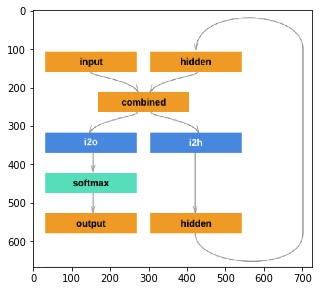

In [73]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
RNN = mpimg.imread('RNNs.png')
plt.figure(figsize = (5,5))
imgplot = plt.imshow(RNN)
plt.show()

In [74]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        # Goodfellow RNN has nn.Tanh()
#         self.i2h = nn.Sequential(nn.Linear(input_size + hidden_size, hidden_size),
#                                  nn.Tanh())
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
#     RNN(input_size, hidden_size, output_size)
# want to predict category of name input
# model therefore can take in 54 different letters and possible output of 18 different languages
# create model!
rnn = RNN(n_letters, n_hidden, n_categories) 

In [75]:
input = letterToTensor('A')
#hidden = n_hidden when we build our model
hidden = torch.zeros(1, n_hidden)

# predict 
output, next_hidden = rnn(input, hidden)
print(output)
# print(next_hidden)

tensor([[-2.8233, -2.8574, -2.8212, -2.8666, -2.9294, -2.9006, -2.8960, -2.8620,
         -2.9405, -2.8901, -2.9077, -2.9325, -2.8935, -2.8999, -2.8994, -2.8893,
         -2.9709, -2.8592]], grad_fn=<LogSoftmaxBackward>)


In [76]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

next_hidden = hidden
for i in range(input.shape[0]):
    output, next_hidden = rnn(input[i], next_hidden)
    '''
    input[0] -> A
    input[1] -> l
    input[2] -> b
    '''
    print(output)

tensor([[-2.8233, -2.8574, -2.8212, -2.8666, -2.9294, -2.9006, -2.8960, -2.8620,
         -2.9405, -2.8901, -2.9077, -2.9325, -2.8935, -2.8999, -2.8994, -2.8893,
         -2.9709, -2.8592]], grad_fn=<LogSoftmaxBackward>)
tensor([[-2.7409, -2.9582, -2.8035, -2.8533, -2.9914, -2.8498, -2.8244, -2.9355,
         -2.8131, -2.9497, -2.9479, -2.8402, -2.9700, -2.9583, -2.8162, -2.8604,
         -3.0187, -2.9485]], grad_fn=<LogSoftmaxBackward>)
tensor([[-2.8629, -2.9387, -2.9526, -2.8887, -2.8771, -2.8876, -2.9011, -2.8421,
         -2.8585, -2.8499, -2.9417, -2.9916, -2.8466, -2.9881, -2.8184, -2.8401,
         -2.8981, -2.8651]], grad_fn=<LogSoftmaxBackward>)
tensor([[-2.7866, -2.9566, -2.8625, -2.7865, -2.9801, -2.8845, -2.8161, -2.9237,
         -2.8538, -2.7683, -2.9482, -2.9255, -2.8919, -3.0456, -2.8710, -2.9529,
         -2.9632, -2.8581]], grad_fn=<LogSoftmaxBackward>)
tensor([[-2.8006, -2.9206, -2.8819, -2.7783, -2.9315, -2.9632, -2.8169, -2.8978,
         -2.9095, -2.8032, -2.9568,

### Training

In [77]:
## get category 
# all_categories: list of 18 languages-> at index 14  = Russia
# all_categories[top_i] = all_categories[14] = Russia
# RNN last layer has 18 neurons
def categoryFromOutput(output):
    '''
    Returns the k largest elements of 
    the given input tensor along 
    a given dimension.
    '''
    top_n, top_i = output.topk(1)
    print("top_n: ", top_n)
    print("top_i: ", top_i)
   
    category_i = top_i[0].item()
    print("category_i: ", category_i)
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

top_n:  tensor([[-2.7307]], grad_fn=<TopkBackward>)
top_i:  tensor([[0]])
category_i:  0
('Arabic', 0)


In [78]:
import random

def randomChoice(l):
    # random.randint range is inclusive thus len(l)-1
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories) # random category eg English
    line = randomChoice(category_lines[category])
    # category_lines: dictionary {'Arabic': [list of arabic names]}
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    # The method index() returns 
    # the lowest index in the list where 
    # the element searched for appears.
    line_tensor = lineToTensor(line)
    # from Jones -> tensor[5,1,54]
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
#     print(category) Polish
#     print(line) Dziedzic
#     print(category_tensor) 12
#     print(line_tensor) 
    print('category =', category, '/ line =', line)

category = French / line = Fabian
category = Scottish / line = Shaw
category = German / line = Von essen
category = Italian / line = Busto
category = Arabic / line = Said
category = Arabic / line = Bazzi
category = Scottish / line = Watt
category = Irish / line = Naomhan
category = Portuguese / line = Garcia
category = German / line = Maurer


#### Loss function

In [79]:
criterion = nn.NLLLoss() 
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

#### Dataloader

In [80]:
batch_size = 4
data_loader = torch.utils.data.DataLoader(randomTrainingExample(), batch_size=batch_size,
                                               shuffle=True, num_workers=2)
num_batches = len(data_loader)
print('num_batches: ', num_batches)

num_batches:  1


In [81]:
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()  

In [82]:
# import time
# import math

# n_iters = 100000
# print_every = 5000
# plot_every = 1000

# # Keep track of losses for plotting
# current_loss = 0
# all_losses = []

# def timeSince(since):
#     now = time.time()
#     s = now - since
#     m = math.floor(s / 60)
#     s -= m * 60
#     return '%dm %ds' % (m, s)

# start = time.time()

# for iter in range(1, n_iters + 1):
#     data = {"category": [],"line" : [],"category_tensor": [], "line_tensor": []}
    
#     padded_data = np.zeros((batch_size, 1,57))
#     print(padded_data.shape)
#     print(padded_data)
#     padded_cattensor = np.zeros((batch_size, ))
#     for i in range(10): 
#         category, line, category_tensor, line_tensor = randomTrainingExample()
#         data["category"].append(category)
#         data["line"].append(line)
#         data["category_tensor"].append(category_tensor)
#         data["line_tensor"].append(line_tensor)
    
# #     print(data)
    
#     for i, x_len in enumerate(data["line_tensor"]):
#         x_len = len(x_len)
#         sequence_data = data["line_tensor"][i]
#         print(sequence_data)
#         sequence_cattensor = data["category_tensor"][i]
#         padded_data[i, 0:x_len] = sequence_data[:x_len]
#         padded_cattensor[i, 0:x_len] = sequence_cattensor[:x_len]
    
#     print(padded_data)
#     print(padded_cattensor)
#     output, loss = train(padded_cattensor, padded_X)
#     current_loss += loss

#     # Print iter number, loss, name and guess
#     if iter % print_every == 0:
#         guess, guess_i = categoryFromOutput(output)
#         correct = '✓' if guess == category else '✗ (%s)' % category
#         print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

#     # Add current loss avg to list of losses
#     if iter % plot_every == 0:
#         all_losses.append(current_loss / plot_every)
#         current_loss = 0

In [83]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

top_n:  tensor([[-2.4475]], grad_fn=<TopkBackward>)
top_i:  tensor([[5]])
category_i:  5
5000 5% (0m 17s) 2.7403 Sappe / French ✗ (Czech)
top_n:  tensor([[-1.2740]], grad_fn=<TopkBackward>)
top_i:  tensor([[11]])
category_i:  11
10000 10% (0m 34s) 1.4318 Che / Korean ✗ (Chinese)
top_n:  tensor([[-0.2921]], grad_fn=<TopkBackward>)
top_i:  tensor([[7]])
category_i:  7
15000 15% (0m 51s) 0.2921 Georgeakopoulos / Greek ✓
top_n:  tensor([[-1.8053]], grad_fn=<TopkBackward>)
top_i:  tensor([[13]])
category_i:  13
20000 20% (1m 9s) 1.9783 Amstel / Portuguese ✗ (Dutch)
top_n:  tensor([[-1.2879]], grad_fn=<TopkBackward>)
top_i:  tensor([[11]])
category_i:  11
25000 25% (1m 26s) 1.4365 Ha / Korean ✗ (Vietnamese)
top_n:  tensor([[-1.5371]], grad_fn=<TopkBackward>)
top_i:  tensor([[15]])
category_i:  15
30000 30% (1m 43s) 2.4059 Leblanc / Scottish ✗ (French)
top_n:  tensor([[-1.1559]], grad_fn=<TopkBackward>)
top_i:  tensor([[17]])
category_i:  17
35000 35% (2m 0s) 1.5334 Liao / Vietnamese ✗ (Chine

####  Plot results

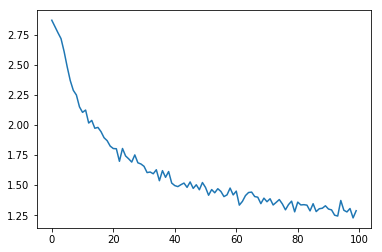

In [84]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

#### Evaluate results

top_n:  tensor([[-1.3621]], grad_fn=<TopkBackward>)
top_i:  tensor([[13]])
category_i:  13
top_n:  tensor([[-1.3578]], grad_fn=<TopkBackward>)
top_i:  tensor([[6]])
category_i:  6
top_n:  tensor([[-2.0292]], grad_fn=<TopkBackward>)
top_i:  tensor([[8]])
category_i:  8
top_n:  tensor([[-0.6122]], grad_fn=<TopkBackward>)
top_i:  tensor([[3]])
category_i:  3
top_n:  tensor([[-1.5577]], grad_fn=<TopkBackward>)
top_i:  tensor([[9]])
category_i:  9
top_n:  tensor([[-0.3218]], grad_fn=<TopkBackward>)
top_i:  tensor([[14]])
category_i:  14
top_n:  tensor([[-0.1149]], grad_fn=<TopkBackward>)
top_i:  tensor([[8]])
category_i:  8
top_n:  tensor([[-0.6454]], grad_fn=<TopkBackward>)
top_i:  tensor([[0]])
category_i:  0
top_n:  tensor([[-0.0935]], grad_fn=<TopkBackward>)
top_i:  tensor([[7]])
category_i:  7
top_n:  tensor([[-0.2822]], grad_fn=<TopkBackward>)
top_i:  tensor([[13]])
category_i:  13
top_n:  tensor([[-1.3824]], grad_fn=<TopkBackward>)
top_i:  tensor([[16]])
category_i:  16
top_n:  tenso

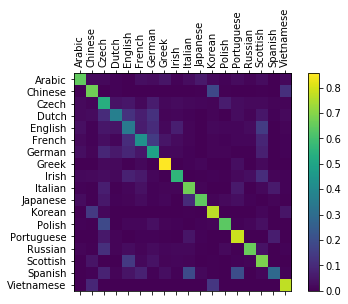

In [85]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

#### Predict

In [86]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')
predict('Charnparttaravanit')


> Dovesky
(-0.35) Czech
(-1.44) Russian
(-3.39) English

> Jackson
(-0.84) English
(-1.07) Scottish
(-2.42) Czech

> Satoshi
(-1.26) Italian
(-1.91) Japanese
(-2.06) Arabic

> Charnparttaravanit
(-0.80) French
(-1.12) Russian
(-2.53) Greek
